In [1]:

import os, os.path
import numpy as np
import pandas as pd
import model_attributes as ma
from attribute_table import AttributeTable
import model_afolu as mafl
import model_ippu as mi
import model_circular_economy as mc
import model_energy as me
import model_electricity as ml
import model_socioeconomic as se
from model_socioeconomic import Socioeconomic
import setup_analysis as sa
import sisepuede as ssp
import support_functions as sf
import importlib
import time
import warnings
import matplotlib.pyplot as plt
import sql_utilities as sq
from typing import *
import sqlalchemy
import sql_utilities as sqlutil
import time
importlib.reload(ma)
importlib.reload(sa)
importlib.reload(sf)
importlib.reload(mafl)
importlib.reload(mc)
importlib.reload(mi)
importlib.reload(me)
importlib.reload(se)
importlib.reload(ml)

warnings.filterwarnings("ignore")

import logging
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_energy_testing.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:2295: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")
/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:2295: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

In [129]:
importlib.reload(ma)
importlib.reload(sa)

df_fake_data = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_complete.csv"))
v = list(sa.model_attributes.build_variable_dataframe_by_sector("Energy")["variable"].unique())
kk = [x for x in v if x not in df_fake_data.columns]
for k in kk:
    print(k)
    




frac_entc_max_production_increase_to_satisfy_msp_pp_biogas
frac_entc_max_production_increase_to_satisfy_msp_pp_biomass
frac_entc_max_production_increase_to_satisfy_msp_pp_coal
frac_entc_max_production_increase_to_satisfy_msp_pp_coal_ccs
frac_entc_max_production_increase_to_satisfy_msp_pp_gas
frac_entc_max_production_increase_to_satisfy_msp_pp_gas_ccs
frac_entc_max_production_increase_to_satisfy_msp_pp_geothermal
frac_entc_max_production_increase_to_satisfy_msp_pp_hydropower
frac_entc_max_production_increase_to_satisfy_msp_pp_nuclear
frac_entc_max_production_increase_to_satisfy_msp_pp_ocean
frac_entc_max_production_increase_to_satisfy_msp_pp_oil
frac_entc_max_production_increase_to_satisfy_msp_pp_solar
frac_entc_max_production_increase_to_satisfy_msp_pp_waste_incineration
frac_entc_max_production_increase_to_satisfy_msp_pp_wind


In [20]:
importlib.reload(ma)
importlib.reload(sa)
importlib.reload(mafl)
importlib.reload(me)
importlib.reload(mi)

#importlib.reload(mafl)
attr_strat = sa.model_attributes.dict_attributes.get("dim_strategy_id")

warnings.filterwarnings("ignore")

df_cs_integrated = pd.read_csv(os.path.join(sa.dir_tmp, "temporary_full_inputs.csv"))
df_cs_integrated = df_cs_integrated[
    df_cs_integrated["strategy_id"].isin([3026])
].reset_index(drop = True)

df_fake_data = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_complete.csv"))

it = [z for z in df_fake_data.columns if z not in df_cs_integrated.columns]
#it += [z for z in df_fake_data.columns if z.startswith("nemomod_entc_total_annual_max_capacity_investment")]
if True:
    for x in it:
        df_cs_integrated[x] = list(df_fake_data[x])

In [70]:
del strat_run

In [25]:
importlib.reload(se)
importlib.reload(ma)
importlib.reload(sa)
importlib.reload(mc)
importlib.reload(mafl)
importlib.reload(me)
importlib.reload(mi)
importlib.reload(ml)

#importlib.reload(mafl)
attr_strat = sa.model_attributes.dict_attributes.get("dim_strategy_id")


model_afolu = mafl.AFOLU(sa.model_attributes);
model_circecon = mc.CircularEconomy(sa.model_attributes);
model_ippu = mi.IPPU(sa.model_attributes);
model_elec = ml.ElectricEnergy(sa.model_attributes, sa.dir_jl, sa.dir_ref_nemo, logger = logger, initialize_julia = False);
model_energy = me.NonElectricEnergy(sa.model_attributes);
model_socioeconomic = se.Socioeconomic(sa.model_attributes);


warnings.filterwarnings("ignore")
#strat_run = 0

df_cs_integrated_0 = pd.read_csv(os.path.join(sa.dir_tmp, "temporary_full_inputs.csv"))
df_fake_data_0 = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_complete.csv"))

def run_strat(
    strat_run: int,
    df_in: pd.DataFrame,
    df_fake_data: pd.DataFrame,
) -> pd.DataFrame:
    df_cs_integrated = df_in[
        df_in["strategy_id"].isin([strat_run])
    ].reset_index(drop = True)


    if False:

        strat_run = 3009#0

        df_cs_integrated = pd.read_csv(
            os.path.join(sa.dir_tmp, "temporary_full_inputs.csv")
        )
        df_cs_integrated = df_cs_integrated[df_cs_integrated["strategy_id"] == strat_run].reset_index(drop = True)
        vars_try = [x for x in df_cs_integrated.columns if x.startswith("fuelefficiency_") and ("road_light" in x)]
        for x in vars_try:
            df_cs_integrated[x] = min(np.array(df_cs_integrated[x]))

        #
        #  ADD IN SOME MISSING DATA (TEMP)
        #
        if False:
            df_msp_fd = model_elec.model_attributes.build_varlist(
                model_elec.model_attributes.subsec_name_entc,
                model_elec.modvar_entc_nemomod_min_share_production
            )
            df_msp_fd = df_fake_data[[model_elec.model_attributes.dim_time_period] + df_msp_fd]

            df_cs_integrated = pd.merge(
                df_cs_integrated,
                df_msp_fd,
                on = [sa.model_attributes.dim_time_period]
            )

    it = [z for z in df_fake_data.columns if z not in df_cs_integrated.columns]
    #it += [z for z in df_fake_data.columns if z.startswith("nemomod_entc_total_annual_max_capacity_investment")]
    if True:
        for x in it:
            df_cs_integrated[x] = list(df_fake_data[x])

    if False:
        # EVEN MORE TEMPORARY--make sure efficiencies for rail are included (set 20230406--should be fixed shortly)
        df_cs_integrated = sf.match_df_to_target_df(
            df_cs_integrated,
            df_fake_data[[
                sa.model_attributes.dim_time_period,
                "fuelefficiency_trns_rail_freight_diesel_km_per_litre",
                "elecfuelefficiency_trns_rail_freight_km_per_kwh",
                "fuelefficiency_trns_rail_passenger_diesel_km_per_litre",
                "elecfuelefficiency_trns_rail_passenger_km_per_kwh"
            ]],
            fields_index = [sa.model_attributes.dim_time_period],
            overwrite_only = False
        )

    # 
    df_project_afolu = model_afolu.project(df_cs_integrated)
    df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_afolu], sa.model_attributes, "concatenate")

    # pass integrated df
    df_project_ce = model_circecon.project(df_cs_integrated)
    df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_ce], sa.model_attributes, "concatenate")

    # pass integrated df
    df_project_ip = model_ippu.project(df_cs_integrated)
    df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_ip], sa.model_attributes, "concatenate")

    # pass integrated df
    df_project_en = model_energy.project(df_cs_integrated);
    df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_en], sa.model_attributes, "concatenate")

    
    df_elec = None
    if False:
        os.remove(sa.fp_sqlite_nemomod_db_tmp) if os.path.exists(sa.fp_sqlite_nemomod_db_tmp) else None
        engine = sqlalchemy.create_engine(f"sqlite:///{sa.fp_sqlite_nemomod_db_tmp}")
        t0 = time.time()
        df_elec = model_elec.project(df_cs_integrated, engine = engine, regions = "brazil")
        t1 = time.time()
        ?
    return df_cs_integrated, df_elec


2023-05-10 12:30:44,959 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/CapacityFactor.csv
2023-05-10 12:30:44,969 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/SpecifiedDemandProfile.csv


In [68]:
import build_model_attributes_metadata as bma
importlib.reload(bma)
df_emission_totals = bma.build_emissions_information_table(sa.model_attributes)

df_emission_totals.to_csv(
    os.path.join(sa.dir_out, "emission_variables_taxonomy_20230510.csv"),
    index = None,
    encoding = "UTF-8",
)

for k in df_emission_totals.columns:
    print(k)

sector
subsector
field
model_variable
category_value
category_name
subsector_total_field
gas
gas_name
subsector_total_field
model_variable_information


In [31]:
sa.model_attributes.get_variable_attribute(
    ":math:\\text{CH}_4 Emissions from Rice",
    "information"
)

'Captures :math:`\\text{CH}_4` emissions from rice paddies'

In [101]:
inds = []
for i, k in enumerate(df_elec_trajectories.min()):
    inds.append(i) if (k < 0) else None
    
ms = df_elec_trajectories.min()[inds]

for i, k in enumerate(ms):
    nm = ms.index[i]
    print(f"{nm}:\t{k}")

elasticity_gnrl_rate_occupancy_to_gdppc:	-0.1
elasticity_ippu_cement_production_to_gdp:	-10.21679124557808
elasticity_ippu_chemicals_production_to_gdp:	-16.62310308336624
elasticity_ippu_electronics_production_to_gdp:	-11.13462152122199
elasticity_ippu_glass_production_to_gdp:	-10.61724178602004
elasticity_ippu_lime_and_carbonite_production_to_gdp:	-128.207633953051
elasticity_ippu_metals_production_to_gdp:	-7.780562490052226
elasticity_ippu_mining_production_to_gdp:	-25.5790470582709
elasticity_ippu_paper_production_to_gdp:	-14.14160879287419
elasticity_ippu_plastic_production_to_gdp:	-8.853718966218983
elasticity_ippu_rubber_and_leather_production_to_gdp:	-16.50979538984014
elasticity_ippu_textiles_production_to_gdp:	-10.82833845377075
emission_co2e_co2_ccsq_direct_air_capture:	-0.6227392
emission_co2e_co2_frst_sequestration_mangroves:	-0.9286229957435802
emission_co2e_co2_frst_sequestration_primary:	-39.12469543449414
emission_co2e_co2_frst_sequestration_secondary:	-0.24182319125611

In [33]:
importlib.reload(se)
model_socioeconomic = se.Socioeconomic(sa.model_attributes)
model_socioeconomic.project(df_cs_integrated_0.iloc[0:36], project_for_internal = False)

time_period  gdp_per_capita_usd  occrate_gnrl_hhs  qty_gnrl_households
0             0        15244.335831          3.145207             38744109
1             1        15160.601480          3.146935             39191590
2             2        15082.614564          3.148554             39630046
3             3        15010.037901          3.150069             40059692
4             4        14942.430901          3.151488             40481052
5             5        14879.451407          3.152816             40894477
6             6        15264.855969          3.144649             40484172
7             7        15324.909494          3.143412             40858242
8             8        15383.919385          3.142202             41232256
9             9        15441.912612          3.141017             41606216
10           10        15498.915224          3.139858             41980124
11           11        15811.458451          3.133526             42379971
12           12        16119.389528          3.127424             42778304
13           13        16422.809798          3.121537             43175210
14           14        16721.817659          3.115853             43570771
15           15        17016.508664          3.110362             43965059
16           16        17359.032326          3.104102             44321826
17           17        17697.437218          3.098050             44677014
18           18        18031.797186          3.092197             45030706
19           19        18362.184324          3.086531             45382983
20           20        18688.669019          3.081043             45733917
21           21        19059.978133          3.074922             46045452
22           22        19427.748160          3.068989             46355386
23           23        19792.029457          3.063234             46663798
24           24        20152.871433          3.057649             46970764
25           25        20510.322567          3.052226             47276353
26           26        20927.372582          3.046020             47543410
27           27        21341.438017          3.039993             47808735
28           28        21752.550796          3.034137             48072409
29           29        22160.742388          3.028443             48334509
30           30        22566.043818          3.022905             48595107
31           31        23042.493691          3.016522             48818639
32           32        23516.593159          3.010316             49040252
33           33        23988.359573          3.004277             49260034
34           34        24457.810112          2.998397             49478068
35           35        24924.961787          2.992670             49694428

In [13]:
df_elec_trajectories, df_elec = run_strat(0, df_cs_integrated_0, df_fake_data_0)

#df_elec_trajectories[[x for x in df_elec_trajectories.columns if ("hydrocarbon_gas" in x) and ("energy_demand") in x]]
df_elec_trajectories["qty_gnrl_households"]

KeyError: 'qty_gnrl_households'

In [71]:
df_elec_trajectories, df_elec = run_strat(0, df_cs_integrated_0, df_fake_data_0)


AttributeError: 'Socioeconomic' object has no attribute 'modvar_econ_gdp_per_capita'

In [79]:
tuple_enfu_production_and_demands = model_energy.project_enfu_production_and_demands(
    df_elec_trajectories, 
    target_energy_units = sa.model_attributes.configuration.get("energy_units_nemomod")
) 

In [91]:
attr_fuel = sa.model_attributes.dict_attributes.get("cat_fuel")
pd.DataFrame(tuple_enfu_production_and_demands[4], columns = attr_fuel.key_values).iloc[30]
tuple_enfu_production_and_demands[0].min()

0.0

In [471]:
# I'm lazy, so I'd just do this:

model_afolu = mafl.AFOLU(sa.model_attributes);
model_circecon = mc.CircularEconomy(sa.model_attributes);
model_ippu = mi.IPPU(sa.model_attributes);
model_elec = ml.ElectricEnergy(sa.model_attributes, sa.dir_jl, sa.dir_ref_nemo, logger = logger, initialize_julia = True);
model_energy = me.NonElectricEnergy(sa.model_attributes);

# do whatever do you do get your baseline inputs FOR ALL SECTORS IN ONE
df_inputs = pd.read_csv(...)

"""
using "calibrate()" here as shorthand for the process - returns outputs (df_outputs_ippu) 
    and inputs that are now calibrated (df_inputs_calibrated_ippu)
    
NOTE: this assumes that df_inputs_calibrated_ippu contains calibrated data from IPPU + all 
    uncalibrated data from other sectors
"""
df_outputs_ippu, df_inputs_calibrated_ippu = calibrate(model_ippu.project(df_inputs))
# this will just add everything from outputs to the inputs data frame
df_inputs = sf.merge_output_df_list([df_inputs_calibrated_ippu, df_outputs_ippu], sa.model_attributes, "concatenate") 


# 
df_outputs_afolu, df_inputs_calibrated_afolu = calibrate(model_afolu.project(df_inputs))
df_inputs = sf.merge_output_df_list([df_inputs_calibrated_afolu, df_outputs_afolu], sa.model_attributes, "concatenate") 

#
#
#
# CONTINUE THE PROCESS FOR OTHER SUBSECTORS
#
#
#

In [472]:
#
#df[
#    df["f"].isin(["fuel_electricity"]) &
#    df["y"].isin([1000])
#]["val"].sum()

df_elec_trajectories, df_elec = run_strat(0, df_cs_integrated_0, df_fake_data_0)
#df_0msp = model_elec.format_nemomod_table_min_share_production(df_elec_trajectories).get("MinShareProduction")

dict_lim = model_elec.format_nemomod_table_total_technology_activity_upper_limit(df_elec_trajectories)
#df = dict_lim.get("TotalTechnologyAnnualActivityLowerLimit")
#t0 = time.time()
#arr_entc_msp, arr_entc_activity_limits = model_elec.get_entc_maxprod_increase_adjusted_msp(df_elec_trajectories)
#print(sf.get_time_elapsed(t0, n_digits = 4))

2023-05-03 14:09:51,532 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-03-May 14:09:51.663 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-03-May 14:09:51.747 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.


Exception ignored in: <function _collection_gced at 0x11fed3060>
Traceback (most recent call last):
  File "/Users/jsyme/anaconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/sqlalchemy/event/registry.py", line 53, in _collection_gced
    def _collection_gced(ref):
    
KeyboardInterrupt: 


KeyboardInterrupt: 

<AxesSubplot: xlabel='time_period'>

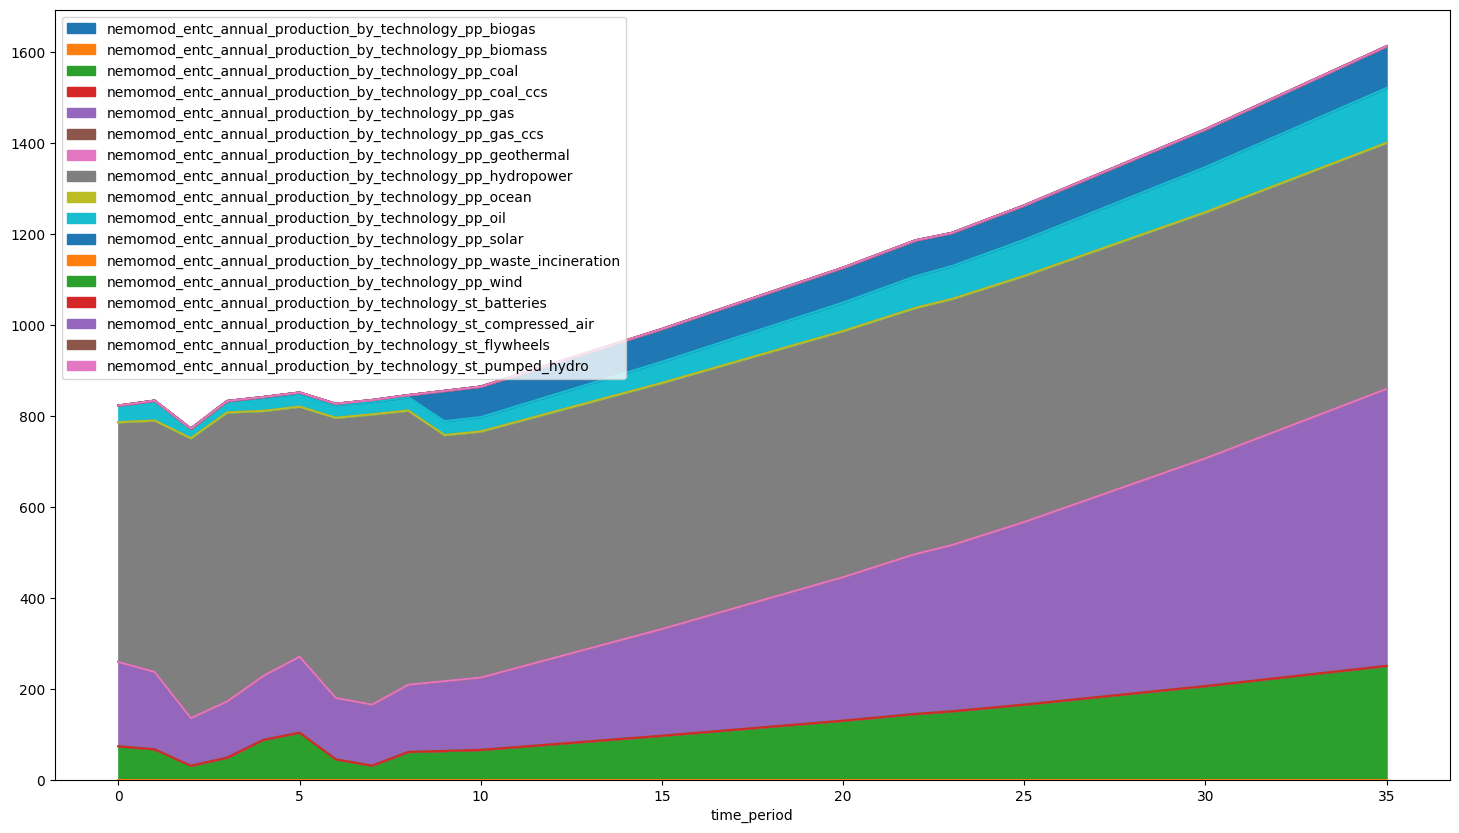

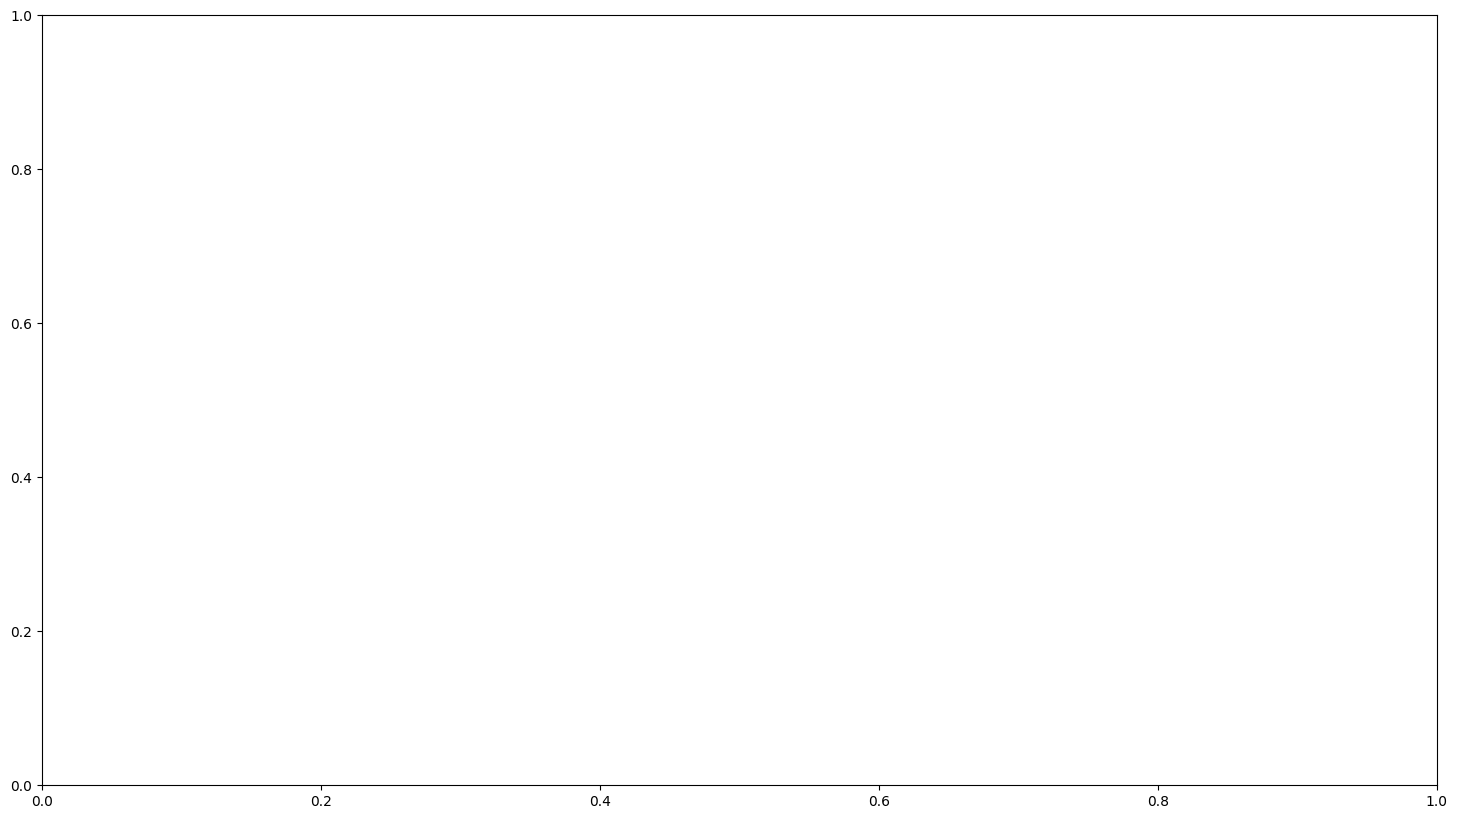

In [470]:
##  WITHOUT CONTROL IN PLACE
df = sa.model_attributes.get_standard_variables(
    df_elec,
    model_elec.modvar_entc_nemomod_production_by_technology
)
df = pd.concat(
    [
        df[[x for x in df.columns if ("nuclear" not in x) and ("crude" not in x)]],
        df_elec[["time_period"]]
    ],
    axis = 1
)

fig, ax = plt.subplots(figsize = (18, 10))
fig, ax2 = plt.subplots(figsize = (18, 10))
df.plot.area(x = "time_period", ax = ax)

#df[["time_period"] + [x for x in df.columns if "hydropower" in x]].plot.area(x = "time_period", ax = ax2)

In [420]:
df2 = pd.DataFrame(
    arr_entc_activity_limits,
    columns = attr_tech.key_values
)
df2[model_elec.model_attributes.dim_time_period] = list(df_elec_trajectories[model_elec.model_attributes.dim_time_period])

#model_elec.model_attributes.build_varlist(
#    None, model_elec.modvar_entc_nemomod_total_annual_max_capacity_investment, restrict_to_category_values = attr_tech.key_values
#)


In [364]:
attr_tech = sa.model_attributes.dict_attributes.get("cat_technology")
df = pd.DataFrame(np.round(arr_entc_msp, decimals = 3), columns = attr_tech.key_values)
df_unadj = pd.DataFrame(np.round(arr_entc_msp_unadj, decimals = 3), columns = attr_tech.key_values)
df[[x for x in df.columns if x.startswith("pp")]]#.sum(axis = 1).tail()

#HEREHERE

pp_biogas  pp_biomass  pp_coal  pp_coal_ccs  pp_gas  pp_gas_ccs  \
0         0.0         0.0    0.051          0.0   0.150         0.0   
1         0.0         0.0    0.049          0.0   0.110         0.0   
2         0.0         0.0    0.044          0.0   0.128         0.0   
3         0.0         0.0    0.040          0.0   0.106         0.0   
4         0.0         0.0    0.040          0.0   0.113         0.0   
5         0.0         0.0    0.033          0.0   0.102         0.0   
6         0.0         0.0    0.040          0.0   0.145         0.0   
7         0.0         0.0    0.017          0.0   0.051         0.0   
8         0.0         0.0    0.036          0.0   0.105         0.0   
9         0.0         0.0    0.036          0.0   0.105         0.0   
10        0.0         0.0    0.036          0.0   0.105         0.0   
11        0.0         0.0    0.036          0.0   0.112         0.0   
12        0.0         0.0    0.036          0.0   0.119         0.0   
13        0.0         0.0    0.036          0.0   0.126         0.0   
14        0.0         0.0    0.000          0.0   0.133         0.0   
15        0.0         0.0    0.000          0.0   0.140         0.0   
16        0.0         0.0    0.000          0.0   0.147         0.0   
17        0.0         0.0    0.000          0.0   0.153         0.0   
18        0.0         0.0    0.000          0.0   0.159         0.0   
19        0.0         0.0    0.000          0.0   0.165         0.0   
20        0.0         0.0    0.000          0.0   0.170         0.0   
21        0.0         0.0    0.000          0.0   0.176         0.0   
22        0.0         0.0    0.000          0.0   0.182         0.0   
23        0.0         0.0    0.000          0.0   0.187         0.0   
24        0.0         0.0    0.000          0.0   0.192         0.0   
25        0.0         0.0    0.000          0.0   0.197         0.0   
26        0.0         0.0    0.000          0.0   0.202         0.0   
27        0.0         0.0    0.000          0.0   0.207         0.0   
28        0.0         0.0    0.000          0.0   0.212         0.0   
29        0.0         0.0    0.000          0.0   0.216         0.0   
30        0.0         0.0    0.000          0.0   0.221         0.0   
31        0.0         0.0    0.000          0.0   0.225         0.0   
32        0.0         0.0    0.000          0.0   0.229         0.0   
33        0.0         0.0    0.000          0.0   0.233         0.0   
34        0.0         0.0    0.000          0.0   0.237         0.0   
35        0.0         0.0    0.000          0.0   0.241         0.0   

    pp_geothermal  pp_hydropower  pp_nuclear  pp_ocean  pp_oil  pp_solar  \
0             0.0          0.716       0.028       0.0   0.054     0.000   
1             0.0          0.780       0.031       0.0   0.029     0.000   
2             0.0          0.764       0.031       0.0   0.031     0.002   
3             0.0          0.793       0.031       0.0   0.024     0.007   
4             0.0          0.784       0.030       0.0   0.019     0.013   
5             0.0          0.796       0.027       0.0   0.020     0.022   
6             0.0          0.635       0.024       0.0   0.034     0.029   
7             0.0          0.760       0.025       0.0   0.005     0.049   
8             0.0          0.699       0.026       0.0   0.025     0.015   
9             0.0          0.699       0.026       0.0   0.025     0.015   
10            0.0          0.699       0.026       0.0   0.025     0.015   
11            0.0          0.000       0.028       0.0   0.027     0.016   
12            0.0          0.000       0.030       0.0   0.029     0.017   
13            0.0          0.000       0.032       0.0   0.030     0.018   
14            0.0          0.000       0.033       0.0   0.032     0.019   
15            0.0          0.000       0.035       0.0   0.034     0.020   
16            0.0          0.000       0.037       0.0   0.035     0.021   
17      

In [343]:
sa.model_attributes.get_standard_variables(
    df_elec_trajectories,
    model_elec.modvar_entc_max_elec_prod_increase_for_msp
)

frac_entc_max_elec_production_increase_to_satisfy_msp_pp_biogas  \
0                                              -999.0                 
1                                              -999.0                 
2                                              -999.0                 
3                                              -999.0                 
4                                              -999.0                 
5                                              -999.0                 
6                                              -999.0                 
7                                              -999.0                 
8                                              -999.0                 
9                                              -999.0                 
10                                             -999.0                 
11                                             -999.0                 
12                                             -999.0                 
13                                             -999.0                 
14                                             -999.0                 
15                                             -999.0                 
16                                             -999.0                 
17                                             -999.0                 
18                                             -999.0                 
19                                             -999.0                 
20                                             -999.0                 
21                                             -999.0                 
22                                             -999.0                 
23                                             -999.0                 
24                                             -999.0                 
25                                             -999.0                 
26                                             -999.0                 
27                                             -999.0                 
28                                             -999.0                 
29                                             -999.0                 
30                                             -999.0                 
31                                             -999.0                 
32                                             -999.0                 
33                                             -999.0                 
34                                             -999.0                 
35                                             -999.0                 

    frac_entc_max_elec_production_increase_to_satisfy_msp_pp_biomass  \
0                                              -999.0                  
1                                              -999.0                  
2                                              -999.0                  
3                                              -999.0                  
4                                              -999.0                  
5                                              -999.0                  
6                                              -999.0                  
7                                              -999.0                  
8                                              -999.0                  
9                                              -999.0                  
10                                             -999.0                  
11                                             -999.0                  
12                                             -999.0                  
13                                             -999.0                  
14                                             -999.0                  
15                                             -999.0                  
16                                             -999.0                  
17                                             -999.0                  
18      

<AxesSubplot: xlabel='time_period'>

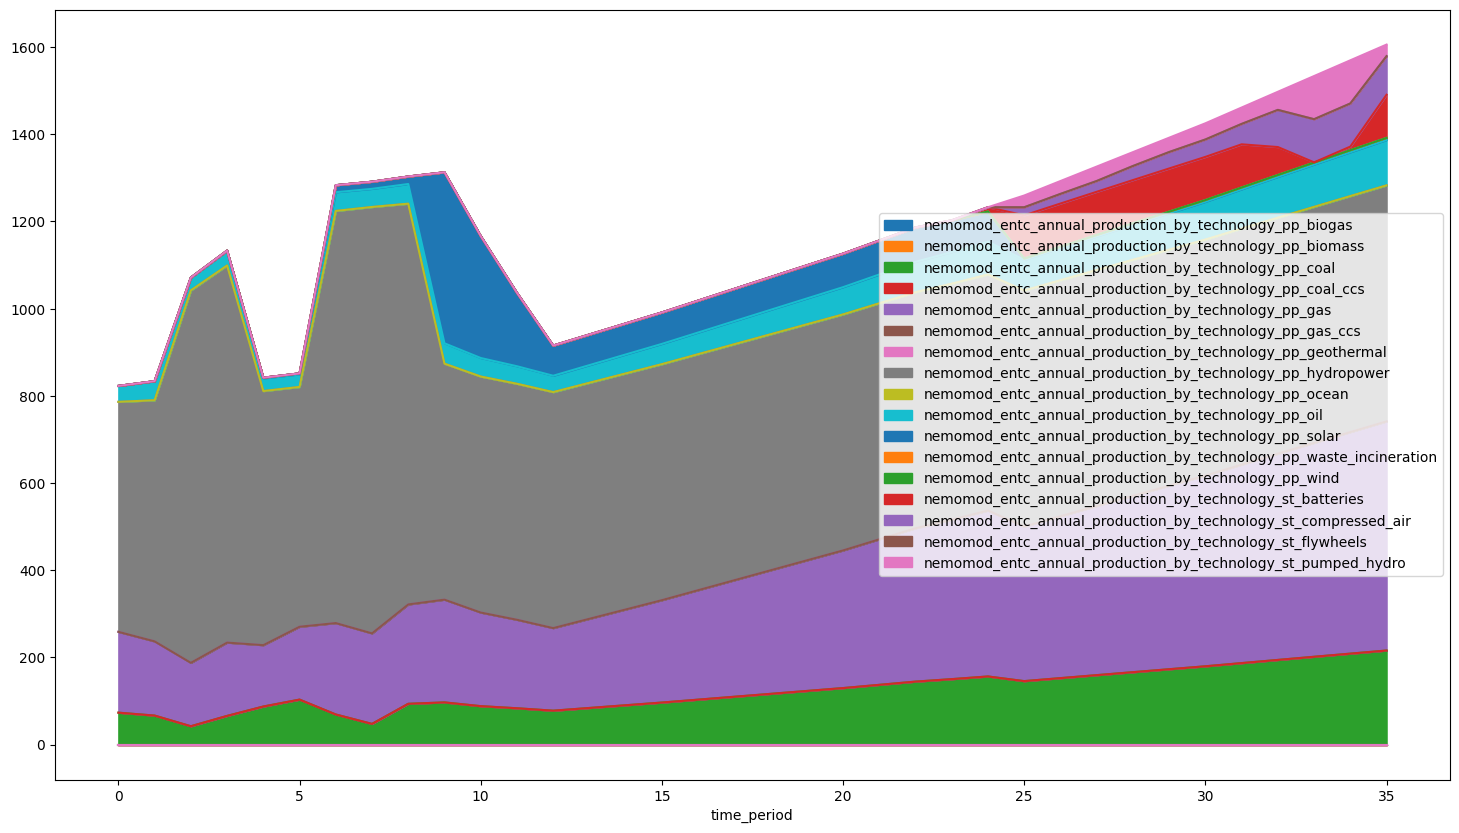

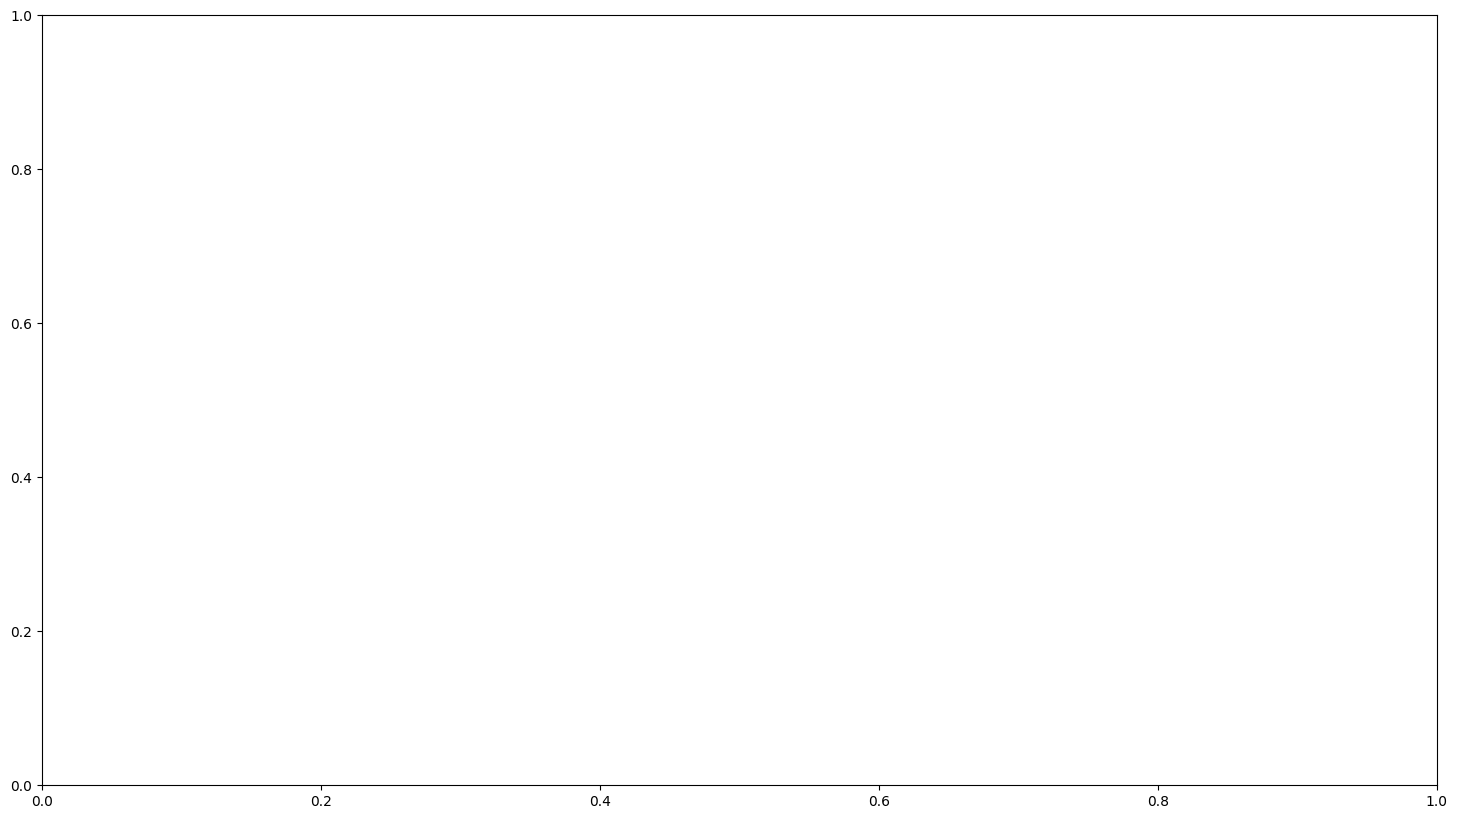

In [467]:
##  WITHOUT CONTROL IN PLACE
df = sa.model_attributes.get_standard_variables(
    df_elec,
    model_elec.modvar_entc_nemomod_production_by_technology
)
df = pd.concat(
    [
        df[[x for x in df.columns if ("nuclear" not in x) and ("crude" not in x)]],
        df_elec[["time_period"]]
    ],
    axis = 1
)

fig, ax = plt.subplots(figsize = (18, 10))
fig, ax2 = plt.subplots(figsize = (18, 10))
df.plot.area(x = "time_period", ax = ax)

#df[["time_period"] + [x for x in df.columns if "hydropower" in x]].plot.area(x = "time_period", ax = ax2)

<AxesSubplot: xlabel='time_period'>

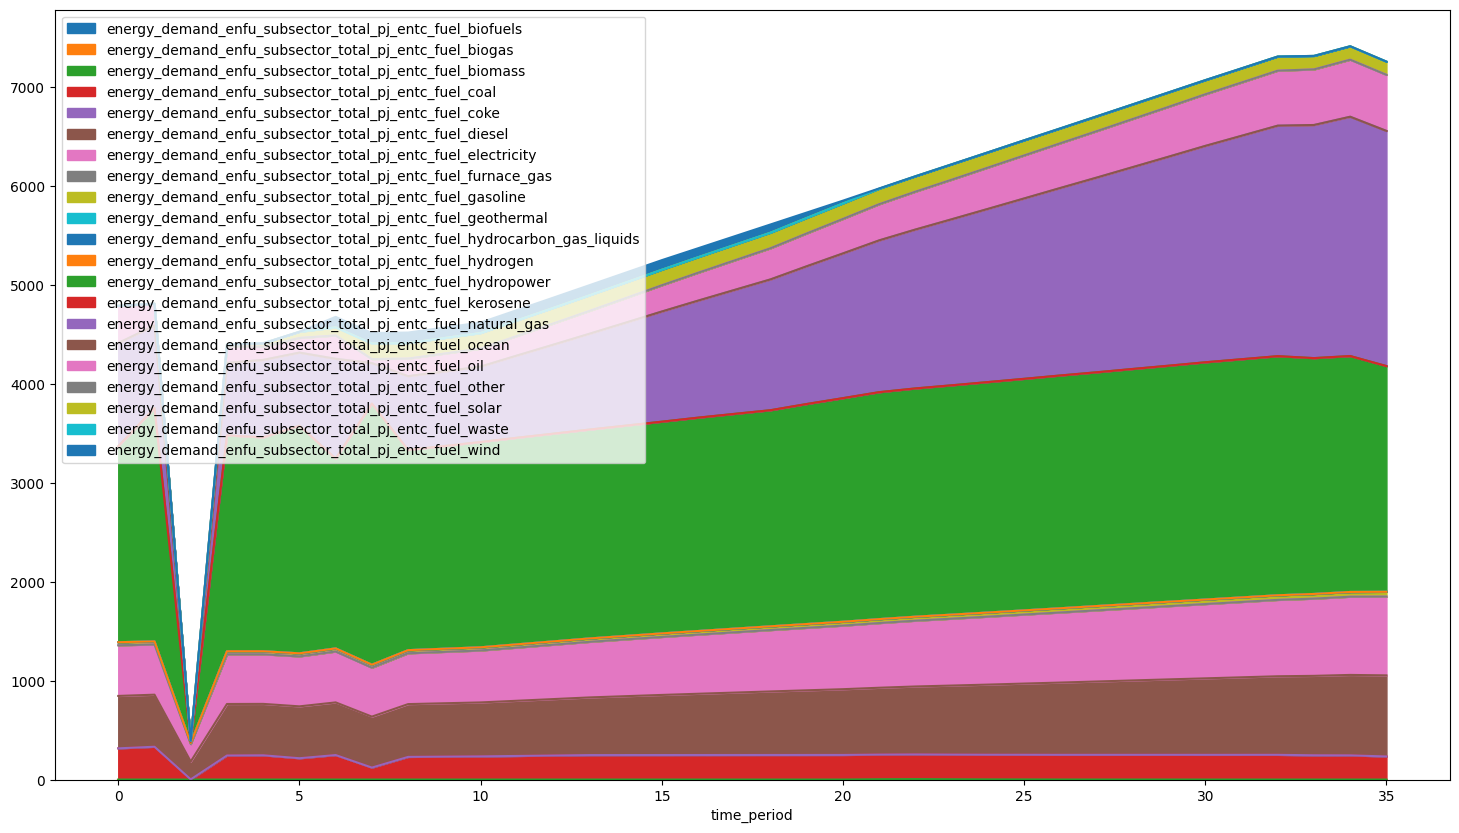

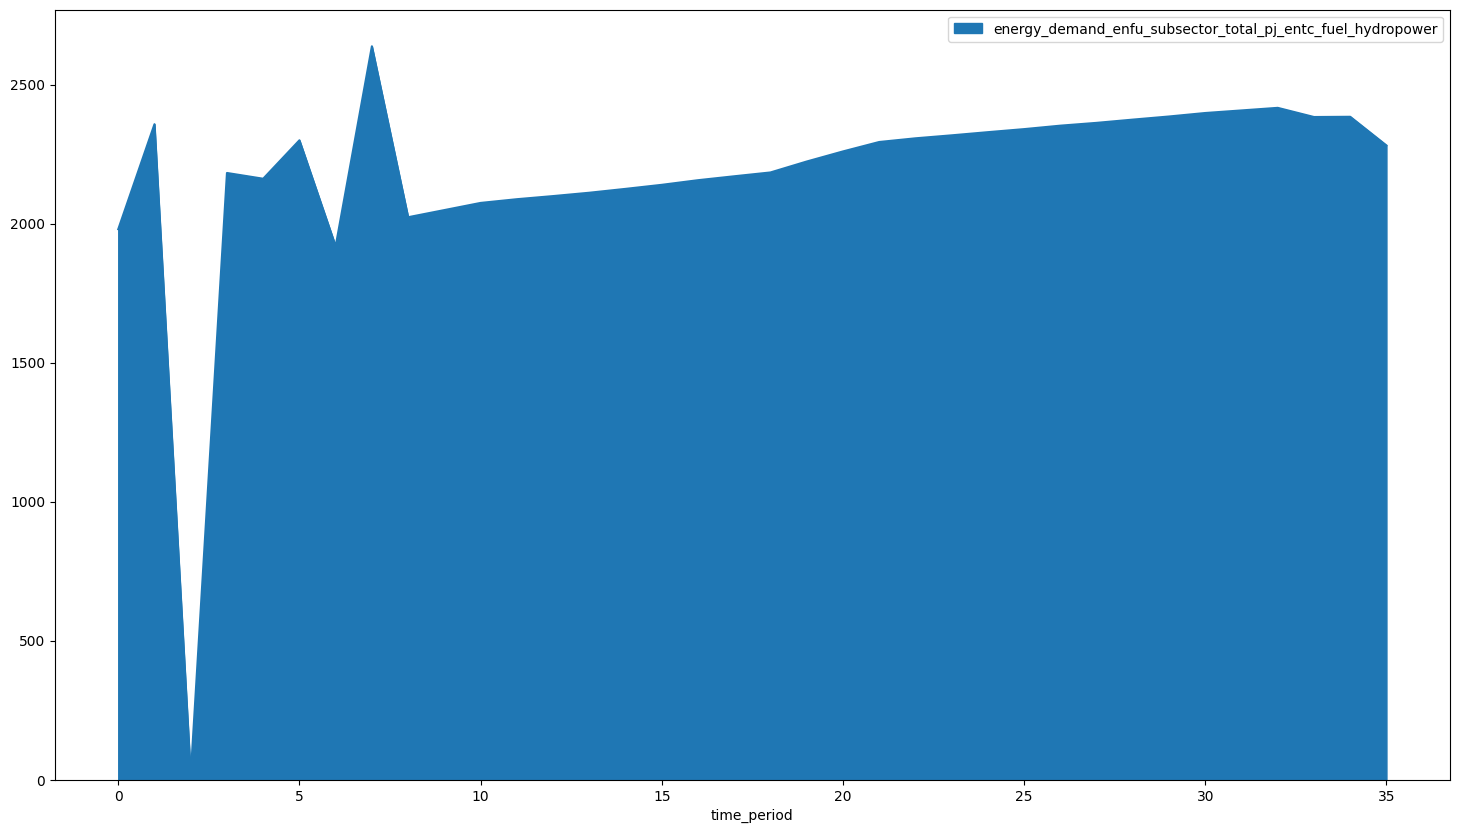

In [310]:
##  WITH CONTROL IN PLACE
df = sa.model_attributes.get_standard_variables(
    df_elec_trajectories[1],
    model_elec.modvar_entc_nemomod_production_by_technology
)
df = pd.concat(
    [
        df[[x for x in df.columns if ("nuclear" not in x) and ("crude" not in x)]],
        df_elec_trajectories[1][["time_period"]]
    ],
    axis = 1
)

fig, ax = plt.subplots(figsize = (18, 10))
fig, ax2 = plt.subplots(figsize = (18, 10))
df.plot.area(x = "time_period", ax = ax)

df[["time_period", "energy_demand_enfu_subsector_total_pj_entc_fuel_hydropower"]].plot.area(x = "time_period", ax = ax2)

In [279]:
def get_entc_maxprod_increase_adjusted_msp(#self,
    df_elec_trajectories: pd.DataFrame,
    adjust_free_msps_in_response: bool = True,
    attribute_fuel: Union[AttributeTable, None] = None,
    attribute_technology: Union[AttributeTable, None] = None,
    drop_flag: Union[float, int] = None,
    modvar_maxprod_msp_increase: Union[str, None] = None,
    modvar_msp: Union[str, None] = None,
    tuple_enfu_production_and_demands: Union[Tuple[pd.DataFrame], None] = None,
) -> np.ndarray:
    """
    Adjust the MinShareProduction input table to allow for the prevention of 
        increases in production to satisfy exogenously specified 
        MinShareProduction.
        
    Example use case: if a baseline relies on the specification of 
        MinShareProduction, yet some technology will not be built after some
        point in time, this variable can be specified to avoid the conlict
        and preserve the relative balance of generation mixes.
        
    If no adjustments are found in modvar_maxprod_msp_increase, then the 
        exogenous specification is returned. 
        
    * Returns an np.ndarray wide by all ENTC categories and long by rows in
        df_elec_trajectories.
        

    Function Arguments
    ------------------
    - df_elec_trajectories: data frame of model variable input trajectories

    Keyword Arguments
    -----------------
    - adjust_free_msps_in_response: MSP trajectories that are not subject to
        no-growth restrictions--or "Free MSPs"--can be adjusted to preserve
        the aggregate share of production that is accounted for by all MSP
        specifications (for a given fuel). If False, Free MSPs are no 
        adjusted.
    - attribute_fuel: AttributeTable for fuel
    - attribute_technology: AttributeTable used to denote technologies with 
        MinShareProductions
    - modvar_maxprod_msp_increase: SISEPUEDE model variable storing the 
        maximum production increase (as a fraction of estimated last period
        with free production) allowable due to exogenous MinShareProduction
    - modvar_msp: SISEPUEDE model variable storing the MinShareProduction
    - tuple_enfu_production_and_demands: optional tuple of energy fuel 
        demands produced by 
        self.model_energy.project_enfu_production_and_demands():

        (
            arr_enfu_demands, 
            arr_enfu_demands_distribution, 
            arr_enfu_export, 
            arr_enfu_imports, 
            arr_enfu_production
        )
    """ 
    
    ##  INITIALIZATION
    
    attribute_technology = (
        model_elec.model_attributes.get_attribute_table(model_elec.subsec_name_entc) 
        if (attribute_technology is None) 
        else attribute_technology
    )
    attribute_fuel = (
        model_elec.model_attributes.get_attribute_table(model_elec.subsec_name_enfu) 
        if (attribute_fuel is None) 
        else attribute_fuel
    )
    drop_flag = model_elec.drop_flag_tech_capacities if (drop_flag is None) else drop_flag
    modvar_maxprod_msp_increase = (
        model_elec.modvar_entc_max_elec_prod_increase_for_msp
        if modvar_maxprod_msp_increase is None
        else modvar_maxprod_msp_increase
    )
    modvar_msp = (
        model_elec.modvar_entc_nemomod_min_share_production
        if modvar_msp is None
        else modvar_msp
    )

    # 
    arr_entc_maxprod_msp_increase = sa.model_attributes.get_standard_variables(
        df_elec_trajectories, 
        modvar_maxprod_msp_increase,
        all_cats_missing_val = drop_flag,
        expand_to_all_cats = True,
        return_type = "array_base"
    )
    
    # get unadjusted MSP
    arr_entc_msp = sa.model_attributes.get_standard_variables(
        df_elec_trajectories,
        modvar_msp,
        expand_to_all_cats = True,
        return_type = "array_base",
        var_bounds = (0, 1)
    )
    
    
    ##  CHECK arr_entc_maxprod_msp_increase FOR NON-DROPS
    ##    if there are no adjustments OR if there is no MSP to adjust
    ##    return arr_entc_msp
    
    w_not_drop = np.where(arr_entc_maxprod_msp_increase != drop_flag)
    if (len(w_not_drop[0]) == 0) or (np.max(arr_entc_msp.sum(axis = 1)) == 0):
        return arr_entc_msp

    
    
    ##  PROCEED WITH ADJUSTMENTS IF NECESSARY - START BY GETTING
    
    # retrieve production (units do not matter since we'll work with adjusting fractions)
    tuple_enfu_production_and_demands = (
        model_elec.model_energy.project_enfu_production_and_demands(
            df_elec_trajectories, 
            target_energy_units = model_elec.model_attributes.configuration.get("energy_units_nemomod")
        )
        if tuple_enfu_production_and_demands is None
        else tuple_enfu_production_and_demands
    )
    
    # get `vec_position_base_prod_est`, the vector storing the time period position of the last time period with free prodution estimate
    dict_entc_cat_to_position_base_prod_est = {}
    inds_modify = np.unique(w_not_drop[1])
    for j in inds_modify:
        # get i_last, the last row with a free production estimate
        w_rows = np.where(w_not_drop[1] == j)
        i_last = min(w_not_drop[0][w_rows[0]]) - 1
        
        cat = attribute_technology.key_values[j]
        dict_entc_cat_to_position_base_prod_est.update({cat: i_last}) if (i_last >= 0) else None
    

    # get fuels to consider in iteration
    fuels_adj = [
        k for k, v in model_elec.dict_entc_fuel_categories_to_fuel_variables.items()
        if model_elec.key_mpi_frac_msp in v.keys()
    ]
    
    arr_entc_msp_unadj = arr_entc_msp.copy()
    
    
    ##  LOOP OVER FUELS ASSOCIATED WITH PRODUCTION TO MODIFY MSPS

    for fuel in fuels_adj:
        # 
        modvar = model_elec.dict_entc_fuel_categories_to_fuel_variables.get(fuel).get(model_elec.key_mpi_frac_msp)
        cats_modvar = model_elec.model_attributes.get_variable_categories(modvar)
        cats_no_growth = [x for x in cats_modvar if x in dict_entc_cat_to_position_base_prod_est.keys()]
        cats_response = [x for x in cats_modvar if x not in cats_no_growth]

        # get column indices of categories that won't grow + those that respond & check sum of MSPs that are subject to non-growth
        inds_no_growth = [attribute_technology.get_key_value_index(x) for x in cats_no_growth]
        inds_response = [attribute_technology.get_key_value_index(x) for x in cats_response]
        inds_all = inds_no_growth + inds_response
        
        if len(inds_no_growth) > 0:
            
            # get column totals of no-growth - only need to modify the array if there are no-growth ENTC cats associated with this fuel
            vec_entc_msp_no_growth = arr_entc_msp[:, inds_no_growth].sum(axis = 1).copy()
            vec_entc_msp_all = arr_entc_msp[:, inds_all].sum(axis = 1).copy()

            if np.max(vec_entc_msp_no_growth) > 0:

                # get projected demand for the fuel
                ind_enfu_fuel = attribute_fuel.get_key_value_index(fuel)
                vec_prod_est_cur_fuel = tuple_enfu_production_and_demands[4][:, ind_enfu_fuel]

                # ordered by cats_no_growth
                row_inds_no_growth = [dict_entc_cat_to_position_base_prod_est.get(x) for x in cats_no_growth]

                for i, j in enumerate(inds_no_growth):

                    # get the estimated production in period tp(row)
                    row = row_inds_no_growth[i]
                    est_prod_floor = vec_prod_est_cur_fuel[row]*arr_entc_msp[row, j]

                    # next, get estimated fraction associated with preserving this estimated production, but use *current* MSP as uppber bound
                    fracs_new = est_prod_floor/vec_prod_est_cur_fuel[(row + 1):]
                    fracs_new *= 1 + sf.vec_bounds(arr_entc_maxprod_msp_increase[(row + 1):, j], (0, np.inf))
                    bounds = [(0.0, x) for x in arr_entc_msp[(row + 1):, j]]
                    fracs_new = sf.vec_bounds(fracs_new, bounds)

                    # overwrite
                    arr_entc_msp[(row + 1):, j] = fracs_new
                    


                # next, check if response MSPs need to be re-scaled to preserve aggregate production shares
                if adjust_free_msps_in_response:
                    
                    vec_entc_msp_no_growth_post_adj = arr_entc_msp[:, inds_no_growth].sum(axis = 1)
                    vec_entc_msp_all_post_adj = arr_entc_msp[:, inds_all].sum(axis = 1)
                    
                    vec_scale_response = vec_entc_msp_all - vec_entc_msp_no_growth_post_adj
                    vec_scale_response /= vec_entc_msp_all - vec_entc_msp_no_growth
                    vec_scale_response = np.nan_to_num(vec_scale_response, 1.0, posinf = 1.0)
                    
                    for j in inds_response:
                        arr_entc_msp[:, j] *= vec_scale_response
                    
        
    return arr_entc_msp


arr_entc_msp = get_msp_adjusted_for_maxprod_increase(df_elec_trajectories)




In [106]:

sa.model_attributes.get_categories_from_attribute_characteristic(
    sa.model_attributes.subsec_name_entc,
    {"power_plant": 1}
)


['pp_biogas',
 'pp_biomass',
 'pp_coal',
 'pp_coal_ccs',
 'pp_gas',
 'pp_gas_ccs',
 'pp_geothermal',
 'pp_hydropower',
 'pp_nuclear',
 'pp_ocean',
 'pp_oil',
 'pp_solar',
 'pp_waste_incineration',
 'pp_wind']

In [107]:
#df_base = pd.read_csv(os.path.join(sa.dir_tmp, "temporary_full_inputs.csv"))
df_b = df_base[df_base[sa.model_attributes.dim_time_period] < 6]
df_b0 = df_b[df_b[sa.model_attributes.dim_strategy_id].isin([0])]
df_b3036 = df_b[df_b[sa.model_attributes.dim_strategy_id].isin([3036])]

df = sa.model_attributes.get_standard_variables(
    df_base[df_base[sa.model_attributes.dim_time_period] < 6],
    model_elec.modvar_entc_nemomod_min_share_production
    #sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
)

set(df[[x for x in df.columns if "_pp_" in x]].sum(axis = 1))


{0.9999999999999997, 0.9999999999999998, 0.9999999999999999}

In [54]:
cols = [
    x for x in df_b.columns 
]
"""
    if (
        ("entc" in x)
        or ("enfu" in x)
        or ("biogas" in x)
        or ("incineration" in x)
        or ("inciner" in x)
        or ("rf_" in x)
        or ("inen" in x)
        or ("trns" in x)
        or ("scoe" in x)
    )
""";


diffs = []
for x in cols:
    
    v0 = np.array(df_b0[x])
    v3036 = np.array(df_b3036[x])
    
    if np.abs(v0 - v3036).max() > 0.000001:
        diffs.append(x)

In [56]:
#df_b0[diffs]
diffs

['strategy_id',
 'nemomod_entc_renewable_energy_tag_st_batteries',
 'nemomod_entc_renewable_energy_tag_st_compressed_air',
 'nemomod_entc_renewable_energy_tag_st_flywheels',
 'nemomod_entc_renewable_energy_tag_st_pumped_hydro']

In [40]:
df_b3036[diffs]

nemomod_entc_renewable_energy_tag_st_batteries  \
1440                                             0.0   
1441                                             0.0   
1442                                             0.0   
1443                                             0.0   
1444                                             0.0   
1445                                             0.0   

      nemomod_entc_renewable_energy_tag_st_compressed_air  \
1440                                                0.0     
1441                                                0.0     
1442                                                0.0     
1443                                                0.0     
1444                                                0.0     
1445                                                0.0     

      nemomod_entc_renewable_energy_tag_st_flywheels  \
1440                                             0.0   
1441                                             0.0   
1442                                             0.0   
1443                                             0.0   
1444                                             0.0   
1445                                             0.0   

      nemomod_entc_renewable_energy_tag_st_pumped_hydro  
1440                                                0.0  
1441                                                0.0  
1442                                                0.0  
1443                                                0.0  
1444                                                0.0  
1445                                                0.0

In [128]:
vars_1 = sa.model_attributes.build_varlist(
    None,
    model_elec.modvar_entc_nemomod_discounted_capital_investment
    #model_elec.modvar_entc_nemomod_total_annual_max_capacity_investment
)

for x in vars_1:
    
    if (x in df_elec_base.columns) and (x in df_elec.columns):
        vec_base = np.array(np.round(df_elec_base[x].iloc[0:rng], decimals = 6))
        vec_cur = np.array(np.round(df_elec[x].iloc[0:rng], decimals = 6))
                
        m = max(np.abs(vec_base - vec_cur))

        if m > 0:
            print(f"{x}:")
            print(vec_cur - vec_base)
            print(vec_base)
    

nemomod_entc_discounted_capital_investment_pp_gas:
[1793.439517    0.          0.          0.          0.      ]
[91909.652798     0.           0.           0.           0.      ]
nemomod_entc_discounted_capital_investment_pp_oil:
[4.572557 0.       0.       0.       0.      ]
[9581.166301    0.          0.          0.          0.      ]
nemomod_entc_discounted_capital_investment_pp_wind:
[-5782.048377     0.           0.           0.           0.      ]
[45660.20097 42360.78997     0.          0.          0.     ]


In [133]:
vars_1 = sa.model_attributes.build_varlist(
    None,
    model_elec.modvar_entc_nemomod_production_by_technology
    #model_elec.modvar_entc_nemomod_total_annual_max_capacity_investment
)

for x in vars_1:
    
    if (x in df_elec_base.columns) and (x in df_elec.columns):
        vec_base = np.array(np.round(df_elec_base[x].iloc[0:rng], decimals = 6))
        vec_cur = np.array(np.round(df_elec[x].iloc[0:rng], decimals = 6))
                
        m = max(np.abs(vec_base - vec_cur))

        if m > 0:
            print(f"{x}:")
            print(vec_cur - vec_base)
            print(vec_base)
    

nemomod_entc_annual_production_by_technology_pp_biomass:
[ 0.       13.567479  0.        0.        0.      ]
[16.469254 86.093419  0.        0.        0.      ]
nemomod_entc_annual_production_by_technology_pp_hydropower:
[15.349066  1.781589  0.       15.349067 15.349066]
[2351.928927 2556.484265   15.724221 2464.895552 2459.25264 ]
nemomod_entc_annual_production_by_technology_pp_wind:
[-15.349067 -15.349067   0.       -15.349067 -15.349067]
[188.469425 326.927755   1.806495 337.094118 342.773402]


In [135]:
df_msp = pd.read_csv(sa.fp_csv_nemomod_minimum_share_of_production_baselines)

In [142]:
df_msp[df_msp["iso_code3"].isin(["BRA"]) & df_msp["year"].isin([2015])].drop(
    ["year", "time_period", "iso_code3"], axis = 1
).iloc[0]

nemomod_entc_frac_min_share_production_pp_coal          0.045000
nemomod_entc_frac_min_share_production_pp_gas           0.132257
nemomod_entc_frac_min_share_production_pp_geothermal    0.000000
nemomod_entc_frac_min_share_production_pp_hydropower    0.629533
nemomod_entc_frac_min_share_production_pp_nuclear       0.024657
nemomod_entc_frac_min_share_production_pp_oil           0.047745
nemomod_entc_frac_min_share_production_pp_solar         0.000104
nemomod_entc_frac_min_share_production_pp_wind          0.038058
Name: 169, dtype: float64

In [335]:

warnings.filterwarnings("ignore")
importlib.reload(ml)
model_elec2 = ml.ElectricEnergy(sa.model_attributes, sa.dir_jl, sa.dir_ref_nemo, logger = None);
tup = model_elec2.retrieve_output_tables_from_sql(
    engine,
    df_cs_integrated
)



  Activating project at `~/Documents/Projects/git_jbus/lac_decarbonization/julia`


In [228]:
#sa.model_attributes.dict_varreqs.get("partial_category_en_entc").table
?sa.model_attributes.assign_keys_from_attribute_fields


Signature:
sa.model_attributes.assign_keys_from_attribute_fields(
    subsector: str,
    field_attribute: str,
    dict_assignment: dict,
    type_table: str = 'categories',
    clean_field_vals: bool = True,
    clean_attr_key: bool = False,
) -> tuple
Docstring:
Assign key_values that are associated with a secondary category. Use 
    matchstrings defined in dict_assignment to create an output 
    dictionary.

    Returns a tuple of following structure:
    * tuple: (dict_out, vars_unassigned)
    * dict_out: takes form
        {
            key_value: {
                assigned_dictionary_key: variable_name, 
                ...
            },
            ...
        }

Function Arguments
------------------
- dict_assignment: dict. {match_str: assigned_dictionary_key} map a 
    variable match string to an assignment
- field_attribute: field in the attribute table to use to split elements
- subsector: the subsector to pull the attribute table from

Keyword Arguments
--------------

In [234]:
sa.model_attributes.assign_keys_from_attribute_fields(
    sa.model_attributes.subsec_name_entc,
    "abbreviation_subsector",
    {
        "NemoMod :math:\\text{CH}_4 Emissions from Electricity Generation": "emissions_ch4",
        "NemoMod :math:\\text{CO}_2 Emissions from Electricity Generation": "emissions_co2",
        "NemoMod :math:\\text{N}_2\\text{O} Emissions from Electricity Generation": "emissions_n2o"
    },
    type_table = "varreqs_partial",
    clean_field_vals = True
)

sa.model_attributes.assign_keys_from_attribute_fields(
    sa.model_attributes.subsec_name_enfu,
    "abbreviation_subsector",
    {
        "Energy Demand by Fuel": "energy_demand"
    },
    type_table = "varreqs_partial",
    clean_field_vals = True
)

({'ccsq': {'energy_demand': 'Energy Demand by Fuel in CCSQ'},
  'entc': {'energy_demand': 'Energy Demand by Fuel in Energy Technology'},
  'inen': {'energy_demand': 'Energy Demand by Fuel in Industrial Energy'},
  'scoe': {'energy_demand': 'Energy Demand by Fuel in SCOE'},
  'trns': {'energy_demand': 'Energy Demand by Fuel in Transportation'}},
 {'ccsq': [], 'entc': [], 'inen': [], 'scoe': [], 'trns': []})

In [238]:
li = [("this", ), ("this2", "nope"), ()]

sum([list(x) for x in li], [])

['this', 'this2', 'nope']

In [212]:
# NOT WORKING APPARENTLYa
sa.model_attributes.get_standard_variables(
    df_cs_integrated,
    model_energy.modvar_trns_passenger_distance_traveled
    #"Total Megatonne-Kilometer Demand by Vehicle"
    #"Freight Transportation Mode Share"
)

passenger_distance_traveled_trns_aviation  \
0                                5.388929e+10   
1                                5.413370e+10   
2                                5.437259e+10   
3                                5.460331e+10   
4                                5.482227e+10   
5                                5.502687e+10   
6                                5.521001e+10   
7                                5.572026e+10   
8                                5.622942e+10   
9                                5.673753e+10   
10                               5.724462e+10   
11                               5.790026e+10   
12                               5.855046e+10   
13                               5.919547e+10   
14                               5.983556e+10   
15                               6.047094e+10   
16                               6.103566e+10   
17                               6.159600e+10   
18                               6.215215e+10   
19                               6.270429e+10   
20                               6.325256e+10   
21                               6.376109e+10   
22                               6.426529e+10   
23                               6.476531e+10   
24                               6.526131e+10   
25                               6.575343e+10   
26                               6.619622e+10   
27                               6.663485e+10   
28                               6.706946e+10   
29                               6.750017e+10   
30                               6.792710e+10   
31                               6.828963e+10   
32                               6.864819e+10   
33                               6.900289e+10   
34                               6.935385e+10   
35                               6.970116e+10   

    passenger_distance_traveled_trns_human_powered  \
0                                     3.372319e+10   
1                                     3.394333e+10   
2                                     3.415994e+10   
3                                     3.437095e+10   
4                                     3.457356e+10   
5                                     3.476569e+10   
6                                     3.477771e+10   
7                                     3.504451e+10   
8                                     3.531092e+10   
9                                     3.557694e+10   
10                                    3.584260e+10   
11                                    3.612911e+10   
12                                    3.641366e+10   
13                                    3.669636e+10   
14                                    3.697730e+10   
15                                    3.725657e+10   
16                                    3.749246e+10   
17                                    3.772679e+10   
18                                    3.795966e+10   
19                                    3.819111e+10   
20                                    3.842120e+10   
21                                    3.861772e+10   
22                                    3.881272e+10   
23                                    3.900627e+10   
24                                    3.919843e+10   
25                                    3.938925e+10   
26                                    3.954395e+10   
27                                    3.969721e+10   
28                                    3.984909e+10   
29                                    3.999965e+10   
30                                    4.014892e+10   
31                                    4.025514e+10   
32                                    4.036002e+10   
33                                    4.046359e+10   
34                                    4.056591e+10   
35                                    4.066700e+10   

    passenger_distance_traveled_trns_powered_bikes  \
0                                     9.107570e+10   
1                                     9.167024e+10   
2                            

In [197]:
importlib.reload(ml)
model_elec = ml.ElectricEnergy(sa.model_attributes, sa.dir_jl, sa.dir_ref_nemo, logger = logger);

2023-04-07 00:25:02,203 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/SpecifiedDemandProfile.csv
2023-04-07 00:25:02,203 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/SpecifiedDemandProfile.csv
2023-04-07 00:25:02,216 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/CapacityFactor.csv
2023-04-07 00:25:02,216 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/CapacityFactor.csv
2023-04-07 00:25:02,328 - INFO - Calling Julia API...
2023-04-07 00:25:02,328 - INFO - Calling Julia API...
2023-04-07 00:25:02,461 - DEBUG - 	Successfully activated Julia with compiled_modules = False
2023-04-07 00:25:02,461 - DEBUG - 	Successfully activated Julia with compiled_modules 

In [175]:
#array_trns_total_vehicle_demand*arr_trns_fuel_fraction_cur
#df_tmp = pd.DataFrame(arr_trns_fuel_fraction_cur[20:23], columns = attr_trns.key_values)
#print(f"arr_trns_fuel_fraction_cur here: {df_tmp.transpose()}")
#importlib.reload(ma)
#importlib.reload(sa)

dict_check = sa.model_attributes.get_multivariables_with_bounded_sum_by_category(
    df_cs_integrated,
    model_energy.modvars_trns_list_fuel_fraction,
    1,
    force_sum_equality = False,
    msg_append = "Energy fractions by category do not sum to 1. See definition of dict_arrs_trns_frac_fuel."
)



In [156]:
modvars = model_energy.modvars_trns_list_fuel_fraction
for modvar in modvars:
    arr_cur = ma.dict_arrs_tmp.get(modvar)

In [166]:
arr_cur[w[0], w[1]]
arr_cur[w[0], w[1]].flatten()/arr[w[0], w[1]].flatten()

array([0.00334247, 0.00334247, 0.00333757, 0.00333757, 0.        ])

In [154]:
arr = 0.0
for k in ma.dict_arrs_tmp.keys():
    arr +=  ma.dict_arrs_tmp.get(k)

    
sum_restriction = 1
correction_threshold = 0.000001
w = np.where(arr > sum_restriction + correction_threshold)[0]

w = np.where((arr <= sum_restriction + correction_threshold) & (arr > sum_restriction))

inds = w[0]*len(arr[0]) + w[1]
inds




array([  6,   7,  16,  17, 214])

In [97]:
model_energy.model_attributes.get_ordered_category_attribute(
    model_energy.subsec_name_trns, 
    pycat_trde, 
    attr_type = "key_varreqs_partial", 
    skip_none_q = True, 
    return_type = dict, 
    clean_attribute_schema_q = True
)

{'Freight Transportation Mode Share': 'freight',
 'Private and Public Transportation Mode Share': 'private_and_public',
 'Regional Transportation Mode Share': 'regional'}

In [96]:
pycat_trde = model_energy.model_attributes.get_subsector_attribute(model_energy.subsec_name_trde, "pycategory_primary")

In [103]:
subsec = model_energy.subsec_name_trde
sa.model_attributes._check_subsector_attribute_table_crosswalk(
    {subsec: "partial_category_en_trde"},
    subsec,
    injection_q = False,
    type_primary = "categories",
    type_target = "varreqs_partial"
)

In [22]:
sa.model_attributes.get_standard_variables(
    df_cs_integrated,
    model_energy.modvar_trde_demand_initial_mtkm
).head()

deminit_trde_freight_mt_km
0                       770.0
1                       770.0
2                       770.0
3                       770.0
4                       770.0

In [ ]:
model_elec = ml.ElectricEnergy(sa.model_attributes, sa.dir_jl, sa.dir_ref_nemo, logger = logger);
os.remove(sa.fp_sqlite_nemomod_db_tmp) if os.path.exists(sa.fp_sqlite_nemomod_db_tmp) else None
engine = sqlalchemy.create_engine(f"sqlite:///{sa.fp_sqlite_nemomod_db_tmp}")
t0 = time.time()
df_test = model_elec.project(df_cs_integrated, engine = engine, regions = "brazil")
t1 = time.time()



In [5]:
importlib.reload(sf)
importlib.reload(ma)
importlib.reload(sa)
importlib.reload(ml)
model_elec = ml.ElectricEnergy(sa.model_attributes, sa.dir_jl, sa.dir_ref_nemo, logger = logger);



2023-03-10 14:20:09,444 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/SpecifiedDemandProfile.csv
2023-03-10 14:20:09,444 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/SpecifiedDemandProfile.csv
2023-03-10 14:20:09,450 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/CapacityFactor.csv
2023-03-10 14:20:09,450 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/CapacityFactor.csv
2023-03-10 14:20:09,533 - INFO - Calling Julia API...
2023-03-10 14:20:09,533 - INFO - Calling Julia API...
2023-03-10 14:20:23,922 - DEBUG - 	Successfully activated Julia with compiled_modules = False
2023-03-10 14:20:23,922 - DEBUG - 	Successfully activated Julia with compiled_modules 

In [6]:
os.remove(sa.fp_sqlite_nemomod_db_tmp) if os.path.exists(sa.fp_sqlite_nemomod_db_tmp) else None
engine = sqlalchemy.create_engine(f"sqlite:///{sa.fp_sqlite_nemomod_db_tmp}")
t0 = time.time()
df_test = model_elec.project(df_cs_integrated, engine = engine, regions = "brazil")
t1 = time.time()

2023-03-10 14:28:08,608 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...
2023-03-10 14:28:08,608 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-10-Mar 14:28:09.686 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-10-Mar 14:28:09.714 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-10-Mar 14:28:37.840 Started modeling scenario.

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107



2023-10-Mar 14:29:35.100 Finished modeling scenario.


ValueError: Unable to coerce to DataFrame, shape must be (36, 23): given (36, 25)

In [15]:
importlib.reload(sf)
importlib.reload(ma)
importlib.reload(sa)
importlib.reload(ml)
model_elec = ml.ElectricEnergy(sa.model_attributes, sa.dir_jl, sa.dir_ref_nemo, logger = logger);


vector_reference_time_period = list(df_cs_integrated["time_period"])
dfs = model_elec.retrieve_nemomod_tables_fuel_production_demand_and_trade(
    engine,
    vector_reference_time_period,
    df_elec_trajectories = df_cs_integrated
)


2023-03-10 15:15:56,621 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/SpecifiedDemandProfile.csv
2023-03-10 15:15:56,621 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/SpecifiedDemandProfile.csv
2023-03-10 15:15:56,630 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/CapacityFactor.csv
2023-03-10 15:15:56,630 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/CapacityFactor.csv
2023-03-10 15:15:56,736 - INFO - Calling Julia API...
2023-03-10 15:15:56,736 - INFO - Calling Julia API...
2023-03-10 15:15:56,755 - DEBUG - 	Successfully activated Julia with compiled_modules = False
2023-03-10 15:15:56,755 - DEBUG - 	Successfully activated Julia with compiled_modules 

In [150]:
sa.model_attributes.get_standard_variables(
    df_cs_integrated,
    
)

3.6e-06

In [151]:
engine = sqlalchemy.create_engine(f"sqlite:///{sa.fp_sqlite_nemomod_db_tmp}")
df = sqlutil.sql_table_to_df(engine, "DefaultParams")
df


id                                     tablename           val
0    1                       AccumulatedAnnualDemand  0.000000e+00
1    2                           AnnualEmissionLimit  1.000000e+10
2    3                       AnnualExogenousEmission  0.000000e+00
3    4                            AvailabilityFactor  1.000000e+00
4    5                                CapacityFactor  1.000000e+00
5    6                   CapacityOfOneTechnologyUnit  0.000000e+00
6    7                        CapacityToActivityUnit  3.155760e+01
7    8                                   CapitalCost  0.000000e+00
8    9                            CapitalCostStorage  0.000000e+00
9   10                            DepreciationMethod  1.000000e+00
10  11                                  DiscountRate  3.000000e-02
11  12                         EmissionActivityRatio  0.000000e+00
12  13                              EmissionsPenalty  0.000000e+00
13  14                                     FixedCost  0.000000e+00
14  15                            InputActivityRatio  0.000000e+00
15  16                              MinStorageCharge  0.000000e+00
16  17                      ModelPeriodEmissionLimit  1.000000e+12
17  18                  ModelPeriodExogenousEmission  0.000000e+00
18  19                               OperationalLife  1.000000e+00
19  20                        OperationalLifeStorage  9.900000e+01
20  21                           OutputActivityRatio  0.000000e+00
21  22                         REMinProductionTarget  0.000000e+00
22  23                               RETagTechnology  0.000000e+00
23  24                                 ReserveMargin  1.000000e-01
24  25                          ReserveMarginTagFuel  0.000000e+00
25  26                    ReserveMarginTagTechnology  0.000000e+00
26  27                              ResidualCapacity  0.000000e+00
27  28                       ResidualStorageCapacity  9.990000e+02
28  29                         SpecifiedAnnualDemand  0.000000e+00
29  30                        SpecifiedDemandProfile  0.000000e+00
30  31                             StorageLevelStart  9.990000e+02
31  32                          StorageMaxChargeRate  9.900000e+01
32  33                       StorageMaxDischargeRate  9.900000e+01
33  34                         TechnologyFromStorage  0.000000e+00
34  35                           TechnologyToStorage  0.000000e+00
35  36                        TotalAnnualMaxCapacity  1.000000e+10
36  37              TotalAnnualMaxCapacityInvestment  1.000000e+10
37  38                        TotalAnnualMinCapacity  0.000000e+00
38  39              TotalAnnualMinCapacityInvestment  0.000000e+00
39  40       TotalTechnologyAnnualActivityLowerLimit  0.000000e+00
40  41       TotalTechnologyAnnualActivityUpperLimit  1.000000e+10
41  42  TotalTechnologyModelPeriodActivityLowerLimit  0.000000e+00
42  43  TotalTechnologyModelPeriodActivityUpperLimit  1.000000e+10
43  44                                    TradeRoute  0.000000e+00
44  45                                  VariableCost  0.000000e+00

In [146]:
model_elec.model_attributes.get_scalar(model_elec.modvar_entc_nemomod_variable_cost, "monetary")


1e-06

In [140]:
if False:
    sa.model_attributes.get_standard_variables(
        df_cs_integrated,
        model_elec.modvar_entc_nemomod_min_share_production
        #modvar_enfu_nemomod_renewable_production_target
    )
    


In [908]:
df_return = [df_cs_integrated, df_test]
df_return = [sf.merge_output_df_list(df_return, sa.model_attributes, "concatenate")]
df_return.append(model_energy.project(df_return[0], subsectors_project = sa.model_attributes.subsec_name_fgtv))

df_return = sf.merge_output_df_list(df_return, sa.model_attributes, "concatenate")



In [693]:
df_sad = sq.sql_table_to_df(engine, "MinShareProduction")
prod = df_sad[
    (df_sad["y"] == "1033")
].sort_values(by = ["f"])
prod


id       r                                    t  \
33    34  brazil                     supply_fuel_coal   
69    70  brazil                    supply_fuel_crude   
105  106  brazil                   supply_fuel_diesel   
141  142  brazil              supply_fuel_electricity   
177  178  brazil                 supply_fuel_gasoline   
213  214  brazil  supply_fuel_hydrocarbon_gas_liquids   
249  250  brazil                 supply_fuel_hydrogen   
285  286  brazil                 supply_fuel_kerosene   
321  322  brazil              supply_fuel_natural_gas   
357  358  brazil                      supply_fuel_oil   

                                f     y       val  
33                      fuel_coal  1033  0.323565  
69                     fuel_crude  1033  0.000000  
105                   fuel_diesel  1033  0.099938  
141              fuel_electricity  1033  0.320639  
177                 fuel_gasoline  1033  0.149987  
213  fuel_hydrocarbon_gas_liquids  1033  0.069915  
249                 fuel_hydrogen  1033  0.015132  
285                 fuel_kerosene  1033  0.099758  
321              fuel_natural_gas  1033  0.355756  
357                      fuel_oil  1033  0.149960

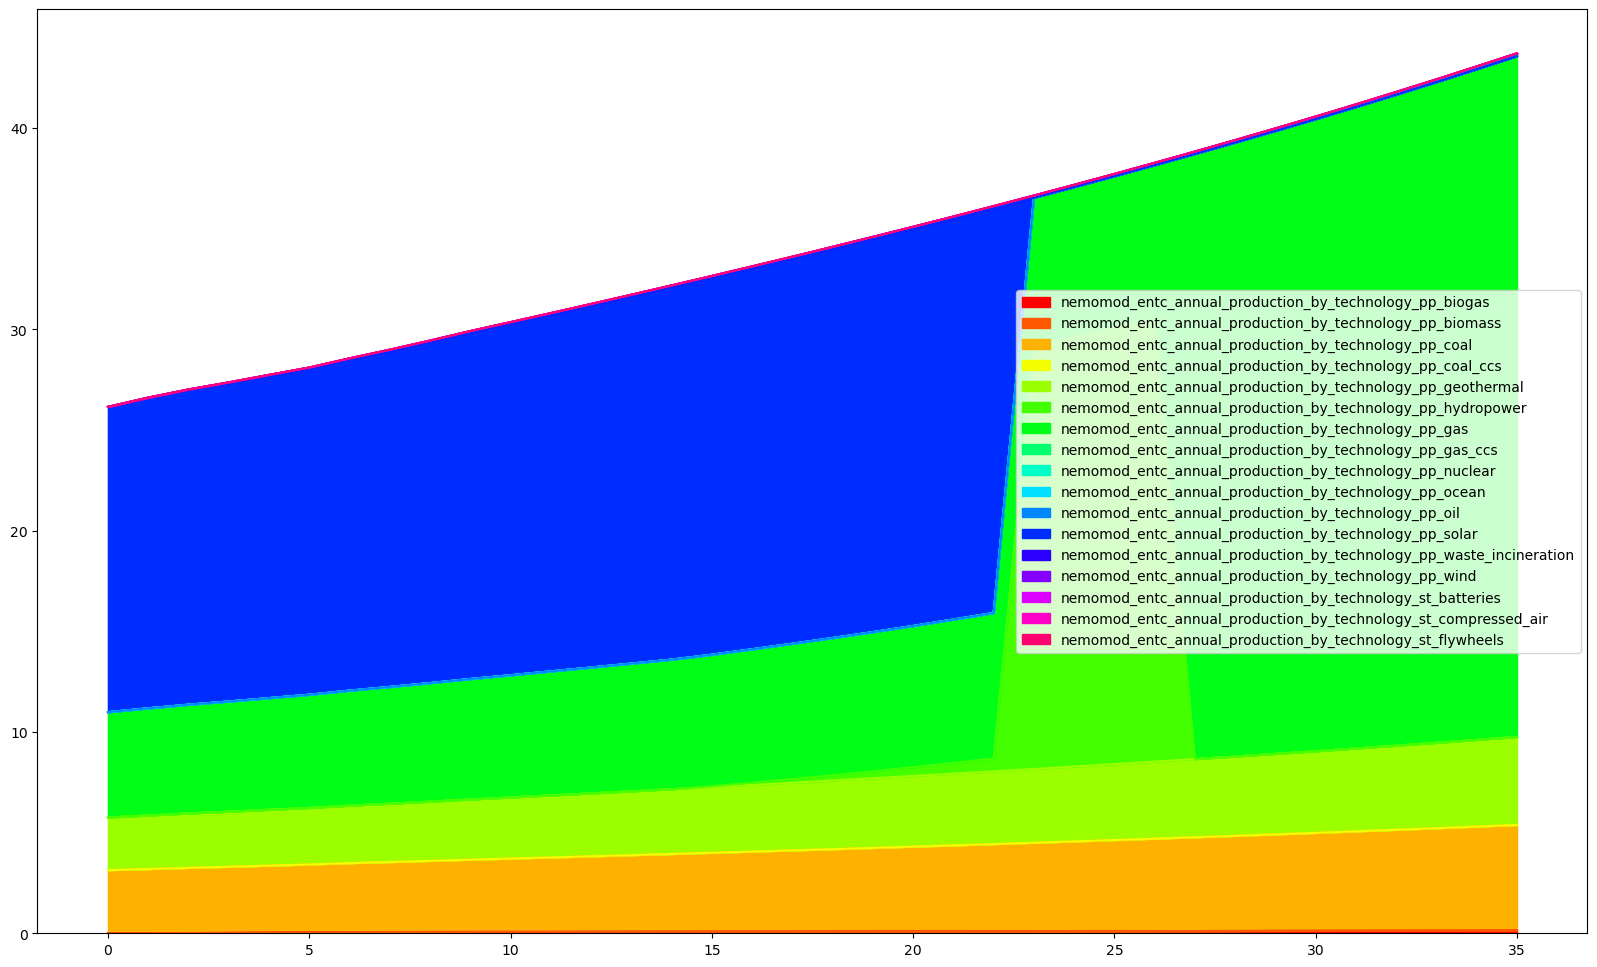

In [915]:


#df_filt = df_out[
#    df_out[sisepuede.key_primary].isin([primary_id])
#]


fig, ax = plt.subplots(figsize = (20, 12))
palette_func = plt.cm.hsv

if True:
    
    df = sa.model_attributes.get_standard_variables(
        df_return,
        #sisepuede.models.model_electricity.modvar_entc_nemomod_discounted_capital_investment
        model_elec.modvar_entc_nemomod_production_by_technology
        #model_energy.modvar_fgtv_emissions_ch4
    )
    for k in df.columns:
        df[k] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    df.plot.area(ax = ax, color = colors)
else:
    sa.model_attributes.get_standard_variables(
        df_cs_integrated,
        model_elec.modvar_entc_nemomod_residual_capacity
    ).plot.area(ax = ax)



In [7]:
?


IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma

In [ ]:
def get_enfu_fuel_costs_per_energy_thermal(self,
        df_neenergy_trajectories: pd.DataFrame,
        modvar_price: Union[str, None] = None,
        units_energy: Union[str, None] = None,
        units_monetary: Union[str, None] = None,
    ) -> Union[pd.DataFrame, None]:
        """
        Retrieve the cost (in units_monetary) of fuels in terms per energy unit 
            units_energy for fuels with thermal pricing (e.g., $/BTU) 

        Function Arguments
        ------------------
        - df_neenergy_trajectories: data frame containing input variables as 
            columns

        Keyword Arguments
        -----------------
        - modvar_price: model variable used to specify price (e.g., 
            self.modvar_enfu_price_thermal)
        - units_energy: valid energy unit. If None (or if invalid), default to 
            configuration units.
        - units_monetary: valid monetary unit. If None (or if invalid), default 
            to configuration units.
        """
        
        modvar_price = self.modvar_enfu_price_thermal if (modvar_price is None) else modvar_price
        
        ##  PREPARE SCALARS
        
        # check input units
        units_energy = (
            self.model_attributes.configuration.get("energy_units")
            if (self.model_attributes.get_energy_equivalent(units_energy) is None) 
            else units_energy
        )
        units_monetary = (
            self.model_attributes.configuration.get("monetary_units")
            if (self.model_attributes.get_monetary_equivalent(units_monetary) is None) 
            else units_monetary
        )
        
        # get some variable characteristics
        varchar_units_monetary_price = self.model_attributes.get_variable_characteristic(
            modvar_price, 
            self.model_attributes.varchar_str_unit_monetary
        )
        varchar_units_energy_density = self.model_attributes.get_variable_characteristic(
            modvar_price, 
            self.model_attributes.varchar_str_unit_energy
        )
        
        # scalars to apply for units conversion
        scalar_energy = self.model_attributes.get_energy_equivalent(
            varchar_units_energy_density,
            units_energy
        )
        
        scalar_monetary = self.model_attributes.get_monetary_equivalent(
            varchar_units_monetary_price,
            units_monetary
        )
        

        ##  GET PRICES AND DENSITY
        
        # get price in terms of output monetary units and convert to output energy units
        arr_price_per_energy = self.model_attributes.get_standard_variables(
            df_neenergy_trajectories,
            modvar_price,
            expand_to_all_cats = True,
            return_type = "array_base",
            var_bounds = (0, np.inf)
        ) * scalar_monetary
        
        arr_price_per_energy = np.nan_to_num(
            arr_price_per_energy/scalar_energy,
            0.0,
            posinf = 0.0
        )
        
        return arr_price_per_energy

In [8]:
model_energy.model_attributes.configuration.valid_energy

['kJ', 'BTU', 'MJ', 'kWh', 'GJ', 'MMBTU', 'MWh', 'TJ', 'MWy', 'PJ', 'GWy']

# Fuel Cost

In [47]:
##
#
#
def get_enfu_fuel_costs_per_energy_volumetric(#self,
    df_neenergy_trajectories: pd.DataFrame,
    units_energy: Union[str, None] = None,
    units_monetary: Union[str, None] = None,
) -> pd.DataFrame:
        """
        Retrieve the cost (in units_monetary) of fuels in terms per energy unit 
            units_energy for fuels with volumetric pricing. 

        Function Arguments
        ------------------
        - df_neenergy_trajectories: data frame containing input variables as columns

        Keyword Arguments
        -----------------
        - units_energy: valid energy unit. If None (or if invalid), default to configuration units.
        - units_monetary: valid monetary unit. If None (or if invalid), default to configuration units.
        """
        
        modvar_density = model_energy.modvar_enfu_energy_density_volumetric
        modvar_price = model_energy.modvar_enfu_price_volumetric
        
        
        ##  PREPARE SCALARS
        
        # check input units
        units_energy = (
            model_energy.model_attributes.configuration.get("energy_units")
            if (model_energy.model_attributes.get_energy_equivalent(units_energy) is None) 
            else units_energy
        )
        units_monetary = (
            model_energy.model_attributes.configuration.get("monetary_units")
            if (model_energy.model_attributes.get_monetary_equivalent(units_monetary) is None) 
            else units_monetary
        )
        
        # get some variable characteristics
        varchar_units_monetary_price = model_energy.model_attributes.get_variable_characteristic(
            modvar_price, 
            model_energy.model_attributes.varchar_str_unit_monetary
        )
        varchar_units_energy_density = model_energy.model_attributes.get_variable_characteristic(
            modvar_density, 
            model_energy.model_attributes.varchar_str_unit_energy
        )
        
        # scalars to apply for units conversion
        scalar_energy = model_energy.model_attributes.get_energy_equivalent(
            varchar_units_energy_density,
            units_energy
        )
        scalar_mass = model_energy.model_attributes.get_variable_unit_conversion_factor(
            modvar_density,
            modvar_price,
            "mass"
        )
        scalar_monetary = model_energy.model_attributes.get_monetary_equivalent(
            varchar_units_monetary_price,
            units_monetary
        )
        

        ##  GET PRICES AND DENSITY
        
        # get price in terms of output monetary units
        arr_price = model_energy.model_attributes.get_standard_variables(
            df_neenergy_trajectories,
            modvar_price,
            expand_to_all_cats = True,
            return_type = "array_base",
            var_bounds = (0, np.inf)
        ) * scalar_monetary
        
        # get density in terms of price specified mass
        arr_density = model_energy.model_attributes.get_standard_variables(
            df_neenergy_trajectories,
            modvar_density,
            expand_to_all_cats = True,
            return_type = "array_base",
            var_bounds = (0, np.inf)
        ) * scalar_mass
        
        # convert to price per unit of energy, then convert to energy units
        arr_price_per_energy = np.nan_to_num(arr_price/arr_density, 0.0, posinf = 0.0)
        arr_price_per_energy /= scalar_energy
        
        return arr_price_per_energy
    
    
    

In [55]:
pr = 1663000 #usd/tonne
ged = 79810000 #gj/tonne

1000000*pr/ged #(usd/gj)



20836.98784613457

In [49]:
attr_fuel = sa.model_attributes.dict_attributes.get("cat_fuel")
attr_fuel.get_key_value_index("fuel_nuclear")

18

In [62]:
arr_price, arr_density, arr_price_per_energy = get_fuel_costs_per_energy_gravimetric(
    df_cs_integrated,
    units_energy = "pj",
    units_monetary = "m_usd"
)
arr_price_per_energy[:, 18]

0.001


array([20.83698785, 20.83698785, 20.83698785, 20.83698785, 20.83698785,
       20.83698785, 20.83698785, 20.83698785, 20.83698785, 20.83698785,
       20.83698785, 20.83698785, 20.83698785, 20.83698785, 20.83698785,
       20.83698785, 20.83698785, 20.83698785, 20.83698785, 20.83698785,
       20.83698785, 20.83698785, 20.83698785, 20.83698785, 20.83698785,
       20.83698785, 20.83698785, 20.83698785, 20.83698785, 20.83698785,
       20.83698785, 20.83698785, 20.83698785, 20.83698785, 20.83698785,
       20.83698785])

In [52]:
#arr_price
df_cs_integrated["cost_enfu_fuel_nuclear_usd_per_tonne"]

0     1663000.0
1     1663000.0
2     1663000.0
3     1663000.0
4     1663000.0
5     1663000.0
6     1663000.0
7     1663000.0
8     1663000.0
9     1663000.0
10    1663000.0
11    1663000.0
12    1663000.0
13    1663000.0
14    1663000.0
15    1663000.0
16    1663000.0
17    1663000.0
18    1663000.0
19    1663000.0
20    1663000.0
21    1663000.0
22    1663000.0
23    1663000.0
24    1663000.0
25    1663000.0
26    1663000.0
27    1663000.0
28    1663000.0
29    1663000.0
30    1663000.0
31    1663000.0
32    1663000.0
33    1663000.0
34    1663000.0
35    1663000.0
Name: cost_enfu_fuel_nuclear_usd_per_tonne, dtype: float64